In [ ]:
# The code was removed by Watson Studio for sharing.

In [1]:
import numpy as np
import dask.dataframe as dd

In [2]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (18,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,325341655,02/11/2015,15:00:00,NaN,NaN,73.0,02/11/2015,359,OFFENSES AGAINST PUBLIC ADMINI,749.0,...,M,NaN,40.664239,-73.908425,"(40.664239422, -73.908425011)",PATROL BORO BKLYN NORTH,NaN,<18,BLACK,M
1,393816841,03/17/2012,10:30:00,03/17/2012,11:00:00,69.0,03/17/2012,344,ASSAULT 3 & RELATED OFFENSES,114.0,...,NaN,NaN,40.644590,-73.892672,"(40.644589618, -73.892672426)",PATROL BORO BKLYN SOUTH,NaN,45-64,BLACK,F
2,802896158,10/27/2016,13:48:00,11/03/2016,13:49:00,71.0,11/03/2016,578,HARRASSMENT 2,638.0,...,M,NaN,40.658758,-73.942435,"(40.658758183, -73.942434788)",PATROL BORO BKLYN SOUTH,NaN,18-24,BLACK,M
3,633812343,11/27/2014,19:00:00,11/27/2014,22:30:00,112.0,11/28/2014,104,RAPE,157.0,...,M,NaN,40.722364,-73.851474,"(40.722363687, -73.851473894)",PATROL BORO QUEENS NORTH,NaN,25-44,WHITE,F
4,300349533,12/11/2013,13:30:00,12/11/2013,14:15:00,24.0,12/12/2013,109,GRAND LARCENY,438.0,...,NaN,NaN,40.793465,-73.968950,"(40.793464597, -73.968949638)",PATROL BORO MAN NORTH,NaN,45-64,WHITE,F


In [3]:
df_data_1['CMPLNT_DATE'] = pd.to_datetime(df_data_1['CMPLNT_FR_DT'], errors = 'coerce')
df_data_1.dropna(subset=['CMPLNT_DATE'], inplace=True)
df_data_1.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,CMPLNT_DATE
0,325341655,02/11/2015,15:00:00,NaN,NaN,73.0,02/11/2015,359,OFFENSES AGAINST PUBLIC ADMINI,749.0,...,NaN,40.664239,-73.908425,"(40.664239422, -73.908425011)",PATROL BORO BKLYN NORTH,NaN,<18,BLACK,M,2015-02-11
1,393816841,03/17/2012,10:30:00,03/17/2012,11:00:00,69.0,03/17/2012,344,ASSAULT 3 & RELATED OFFENSES,114.0,...,NaN,40.644590,-73.892672,"(40.644589618, -73.892672426)",PATROL BORO BKLYN SOUTH,NaN,45-64,BLACK,F,2012-03-17
2,802896158,10/27/2016,13:48:00,11/03/2016,13:49:00,71.0,11/03/2016,578,HARRASSMENT 2,638.0,...,NaN,40.658758,-73.942435,"(40.658758183, -73.942434788)",PATROL BORO BKLYN SOUTH,NaN,18-24,BLACK,M,2016-10-27
3,633812343,11/27/2014,19:00:00,11/27/2014,22:30:00,112.0,11/28/2014,104,RAPE,157.0,...,NaN,40.722364,-73.851474,"(40.722363687, -73.851473894)",PATROL BORO QUEENS NORTH,NaN,25-44,WHITE,F,2014-11-27
4,300349533,12/11/2013,13:30:00,12/11/2013,14:15:00,24.0,12/12/2013,109,GRAND LARCENY,438.0,...,NaN,40.793465,-73.968950,"(40.793464597, -73.968949638)",PATROL BORO MAN NORTH,NaN,45-64,WHITE,F,2013-12-11


In [4]:
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6982397 entries, 0 to 6983206
Data columns (total 36 columns):
 #   Column             Dtype         
---  ------             -----         
 0   CMPLNT_NUM         int64         
 1   CMPLNT_FR_DT       object        
 2   CMPLNT_FR_TM       object        
 3   CMPLNT_TO_DT       object        
 4   CMPLNT_TO_TM       object        
 5   ADDR_PCT_CD        float64       
 6   RPT_DT             object        
 7   KY_CD              int64         
 8   OFNS_DESC          object        
 9   PD_CD              float64       
 10  PD_DESC            object        
 11  CRM_ATPT_CPTD_CD   object        
 12  LAW_CAT_CD         object        
 13  BORO_NM            object        
 14  LOC_OF_OCCUR_DESC  object        
 15  PREM_TYP_DESC      object        
 16  JURIS_DESC         object        
 17  JURISDICTION_CODE  float64       
 18  PARKS_NM           object        
 19  HADEVELOPT         object        
 20  HOUSING_PSA        objec

In [5]:
df_data_1['CMPLNT_YEAR']=df_data_1['CMPLNT_DATE'].map(lambda x:x.strftime('%Y')).astype(int)
df_data_1['CMPLNT_MONTH']=df_data_1['CMPLNT_DATE'].map(lambda x:x.strftime('%m')).astype(int)
df_data_1.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,CMPLNT_DATE,CMPLNT_YEAR,CMPLNT_MONTH
0,325341655,02/11/2015,15:00:00,NaN,NaN,73.0,02/11/2015,359,OFFENSES AGAINST PUBLIC ADMINI,749.0,...,-73.908425,"(40.664239422, -73.908425011)",PATROL BORO BKLYN NORTH,NaN,<18,BLACK,M,2015-02-11,2015,2
1,393816841,03/17/2012,10:30:00,03/17/2012,11:00:00,69.0,03/17/2012,344,ASSAULT 3 & RELATED OFFENSES,114.0,...,-73.892672,"(40.644589618, -73.892672426)",PATROL BORO BKLYN SOUTH,NaN,45-64,BLACK,F,2012-03-17,2012,3
2,802896158,10/27/2016,13:48:00,11/03/2016,13:49:00,71.0,11/03/2016,578,HARRASSMENT 2,638.0,...,-73.942435,"(40.658758183, -73.942434788)",PATROL BORO BKLYN SOUTH,NaN,18-24,BLACK,M,2016-10-27,2016,10
3,633812343,11/27/2014,19:00:00,11/27/2014,22:30:00,112.0,11/28/2014,104,RAPE,157.0,...,-73.851474,"(40.722363687, -73.851473894)",PATROL BORO QUEENS NORTH,NaN,25-44,WHITE,F,2014-11-27,2014,11
4,300349533,12/11/2013,13:30:00,12/11/2013,14:15:00,24.0,12/12/2013,109,GRAND LARCENY,438.0,...,-73.968950,"(40.793464597, -73.968949638)",PATROL BORO MAN NORTH,NaN,45-64,WHITE,F,2013-12-11,2013,12


In [6]:
df_data = df_data_1[['CMPLNT_NUM', 'CMPLNT_DATE', 'CMPLNT_YEAR', 'CMPLNT_MONTH', 'OFNS_DESC', 'LAW_CAT_CD', 'BORO_NM', 'Latitude', 'Longitude', 'Lat_Lon']]
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6982397 entries, 0 to 6983206
Data columns (total 10 columns):
 #   Column        Dtype         
---  ------        -----         
 0   CMPLNT_NUM    int64         
 1   CMPLNT_DATE   datetime64[ns]
 2   CMPLNT_YEAR   int64         
 3   CMPLNT_MONTH  int64         
 4   OFNS_DESC     object        
 5   LAW_CAT_CD    object        
 6   BORO_NM       object        
 7   Latitude      float64       
 8   Longitude     float64       
 9   Lat_Lon       object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 586.0+ MB


In [7]:
df_data.sort_values(by=['CMPLNT_DATE'], inplace=True)

df_data.reset_index(drop=True)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,CMPLNT_NUM,CMPLNT_DATE,CMPLNT_YEAR,CMPLNT_MONTH,OFNS_DESC,LAW_CAT_CD,BORO_NM,Latitude,Longitude,Lat_Lon
0,944477711,1900-03-10,1900,3,BURGLARY,FELONY,BROOKLYN,40.646130,-73.973227,"(40.646129746, -73.973227133)"
1,857331711,1900-05-08,1900,5,ASSAULT 3 & RELATED OFFENSES,MISDEMEANOR,MANHATTAN,40.788861,-73.952004,"(40.788861361, -73.95200411)"
2,346351111,1900-08-06,1900,8,FRAUDS,MISDEMEANOR,MANHATTAN,40.774602,-73.945017,"(40.774602082, -73.94501725)"
3,130320181,1900-08-07,1900,8,BURGLARY,FELONY,BROOKLYN,40.603887,-73.942543,"(40.603887149, -73.942543318)"
4,667928187,1900-11-26,1900,11,HARRASSMENT 2,VIOLATION,MANHATTAN,40.735323,-73.984240,"(40.735323079, -73.984240111)"
...,...,...,...,...,...,...,...,...,...,...
6982392,523951474,2019-12-31,2019,12,PETIT LARCENY,MISDEMEANOR,MANHATTAN,40.757396,-73.969623,"(40.757396174000064, -73.96962338999998)"
6982393,113819683,2019-12-31,2019,12,PETIT LARCENY,MISDEMEANOR,MANHATTAN,40.744173,-73.993740,"(40.744173068000066, -73.99374010399998)"
6982394,769376585,2019-12-31,2019,12,CRIMINAL MISCHIEF & RELATED OF,MISDEMEANOR,QUEENS,40.744057,-73.891805,"(40.74405654700007, -73.89180486099997)"
6982395,115473641,2019-12-31,2019,12,PETIT LARCENY,MISDEMEANOR,MANHATTAN,40.816801,-73.947240,"(40.816800597000054, -73.94724037699996)"


In [9]:
df_data=df_data.loc[df_data['CMPLNT_DATE'] > '2015-01-01']
df_data.reset_index(drop=True)

,CMPLNT_NUM,CMPLNT_DATE,CMPLNT_YEAR,CMPLNT_MONTH,OFNS_DESC,LAW_CAT_CD,BORO_NM,Latitude,Longitude,Lat_Lon
0,975856453,2015-01-02,2015,1,FORGERY,FELONY,BRONX,40.817474,-73.896360,"(40.817474228, -73.896360494)"
1,102186725,2015-01-02,2015,1,GRAND LARCENY,FELONY,MANHATTAN,40.784861,-73.949580,"(40.78486125, -73.949580368)"
2,709365883,2015-01-02,2015,1,PETIT LARCENY,MISDEMEANOR,BROOKLYN,40.681125,-73.959913,"(40.681124557, -73.959912645)"
3,631352763,2015-01-02,2015,1,ASSAULT 3 & RELATED OFFENSES,MISDEMEANOR,BRONX,40.888271,-73.861895,"(40.888270741, -73.861895377)"
4,849711956,2015-01-02,2015,1,DANGEROUS WEAPONS,FELONY,QUEENS,40.677040,-73.824676,"(40.677040001, -73.824676307)"
...,...,...,...,...,...,...,...,...,...,...
2353274,523951474,2019-12-31,2019,12,PETIT LARCENY,MISDEMEANOR,MANHATTAN,40.757396,-73.969623,"(40.757396174000064, -73.96962338999998)"
2353275,113819683,2019-12-31,2019,12,PETIT LARCENY,MISDEMEANOR,MANHATTAN,40.744173,-73.993740,"(40.744173068000066, -73.99374010399998)"
2353276,769376585,2019-12-31,2019,12,CRIMINAL MISCHIEF & RELATED OF,MISDEMEANOR,QUEENS,40.744057,-73.891805,"(40.74405654700007, -73.89180486099997)"
2353277,115473641,2019-12-31,2019,12,PETIT LARCENY,MISDEMEANOR,MANHATTAN,40.816801,-73.947240,"(40.816800597000054, -73.94724037699996)"


In [35]:
# save processed data to csv
# Import the lib
from project_lib import Project
project = Project(project_id='ed0835f6-192e-41ad-a9c7-e66d5f9f9b68', project_access_token='p-32532cd1a9f2391e87790f9eb50d22c1d48f2275')
pc = project.project_context

In [36]:
project.save_data(data=df_data.to_csv(index=False),file_name='data1.csv')

{'file_name': 'data1.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'nyccrimeanalysis-donotdelete-pr-hixueakb9xdfua',
 'asset_id': 'b1b6eec7-df66-4af3-9540-1481e7fa118d'}

In [39]:
crime_group_df = pd.DataFrame({'Number of Crime': df_data.groupby(['OFNS_DESC']).size()}).reset_index()
df_data['OFNS_DESC'].value_counts()

PETIT LARCENY                      423415
HARRASSMENT 2                      337571
ASSAULT 3 & RELATED OFFENSES       262258
CRIMINAL MISCHIEF & RELATED OF     241154
GRAND LARCENY                      219791
                                    ...  
OTHER TRAFFIC INFRACTION                3
KIDNAPPING AND RELATED OFFENSES         2
UNDER THE INFLUENCE OF DRUGS            1
FORTUNE TELLING                         1
OFFENSES AGAINST MARRIAGE UNCL          1
Name: OFNS_DESC, Length: 69, dtype: int64

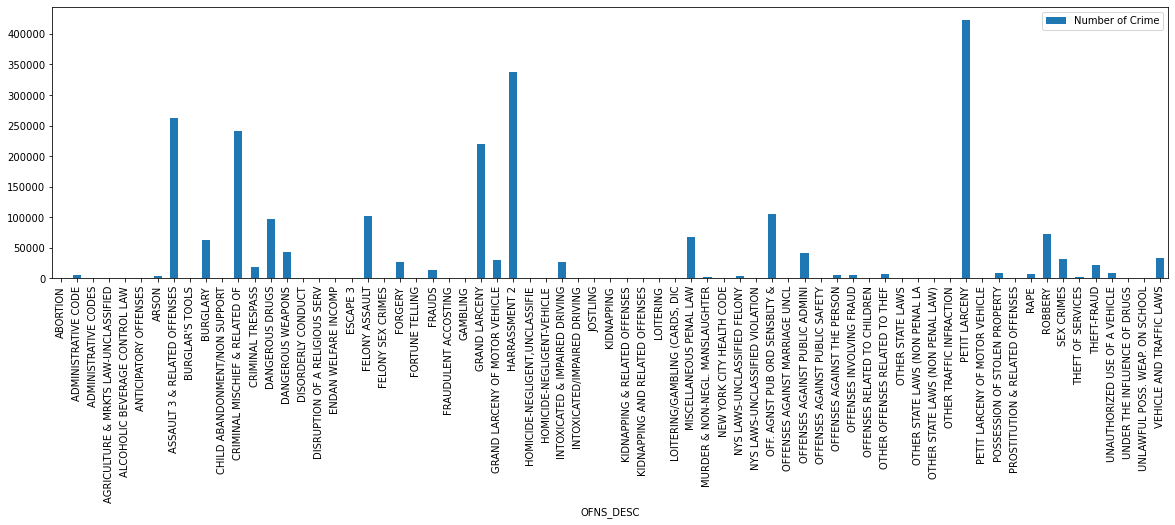

In [40]:
crime_group_df.plot(kind='bar', x='OFNS_DESC', y='Number of Crime', figsize=(20,5))

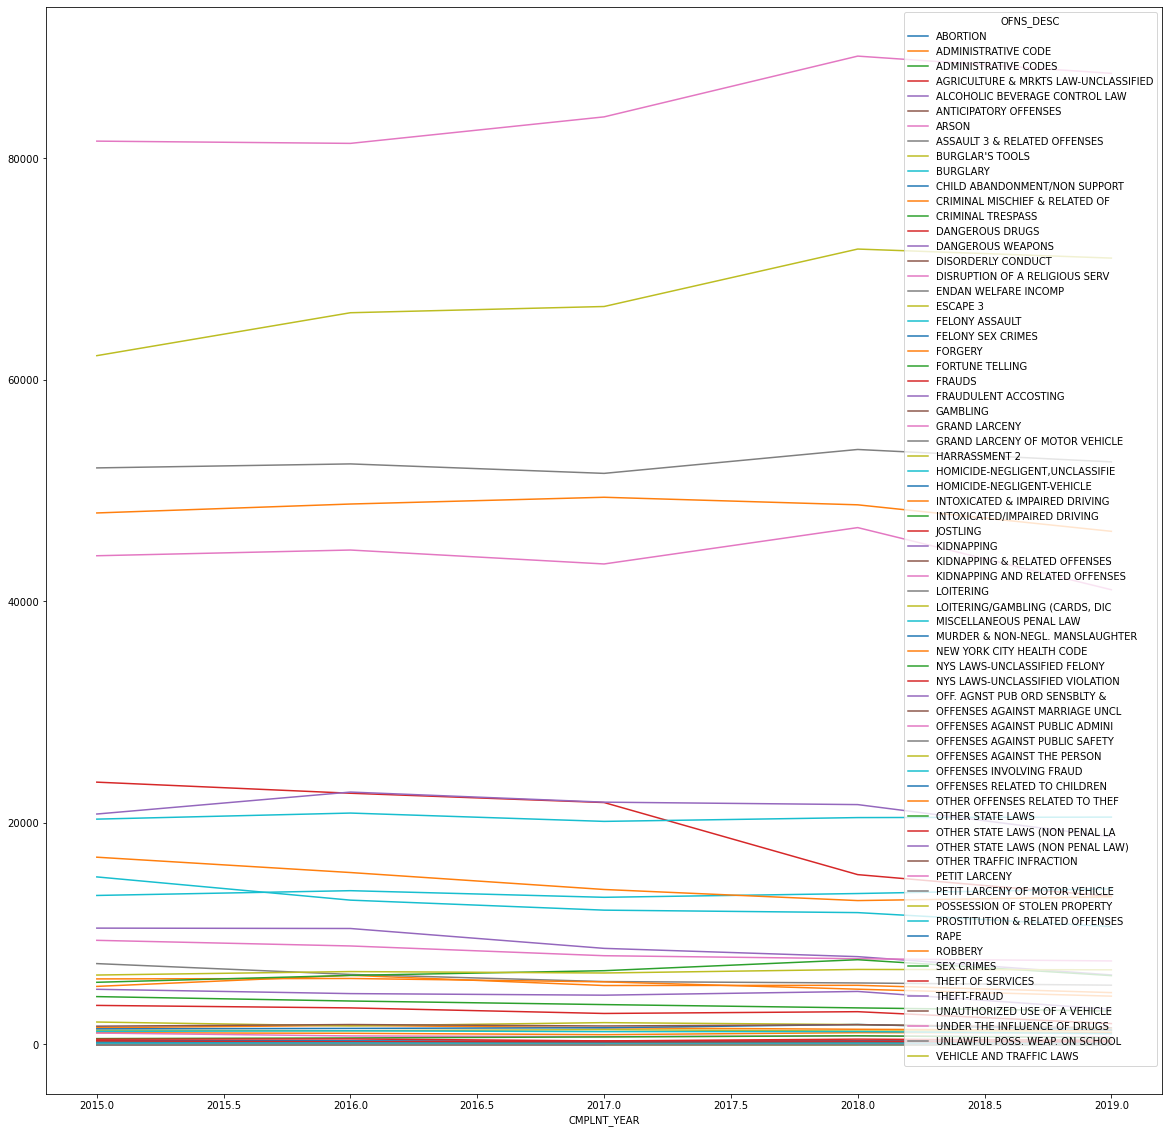

In [44]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 20))
df_data.groupby(['CMPLNT_YEAR', 'OFNS_DESC']).count()['CMPLNT_NUM'].unstack().plot(ax=ax)